In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
import pandas as pd

file_path = r"D:\python all 2025\water_potability.csv"  # Use raw string format
df = pd.read_csv(file_path)

print(df.head(3000)) 



             ph    Hardness        Solids  Chloramines     Sulfate  \
0           NaN  204.890455  20791.318981     7.300212  368.516441   
1      3.716080  129.422921  18630.057858     6.635246         NaN   
2      8.099124  224.236259  19909.541732     9.275884         NaN   
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
...         ...         ...           ...          ...         ...   
2995   5.584124  203.756426  29999.987005     7.213329  310.660284   
2996        NaN  205.065879  16034.453699     7.136008  397.469678   
2997  10.331273  166.459779  15824.822709     6.396364  361.156178   
2998   9.130796  200.032348  28273.603243     7.497526         NaN   
2999   4.618851  199.318913  27174.687638     7.218588  371.056861   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1    

In [45]:
from sklearn.impute import SimpleImputer

# Replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Verify if all missing values are handled
print(df.isnull().sum())


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [41]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display the duplicate rows (if any)
if not duplicate_rows.empty:
    print(duplicate_rows)


Number of duplicate rows: 0


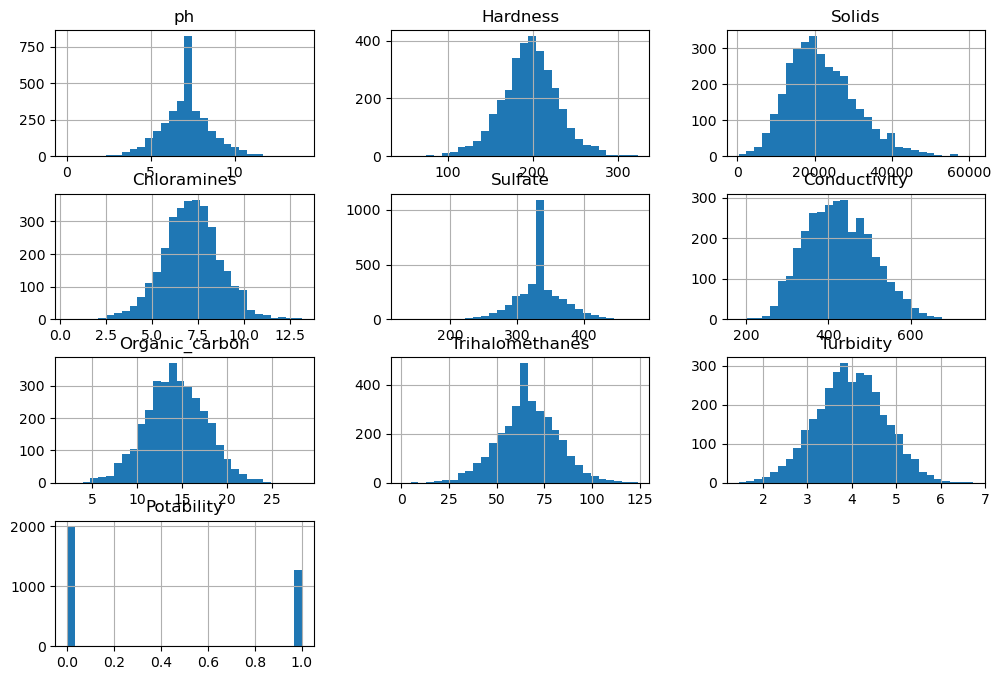

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt  

# Plot distribution of numerical features
df.hist(figsize=(12, 8), bins=30)
plt.show()


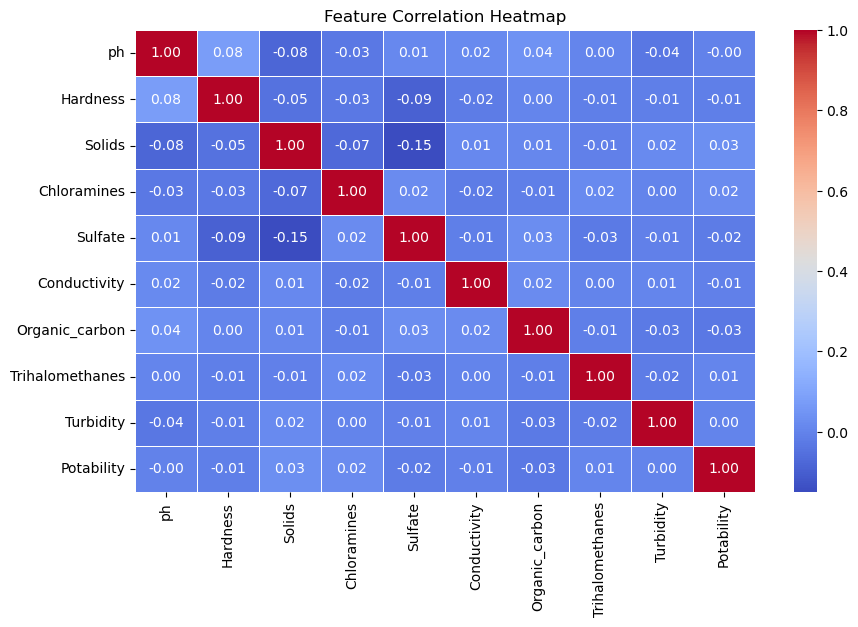

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is already loaded
X = df.drop(columns=['Potability'])  # Independent variables
y = df['Potability']  # Target variable

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


NameError: name 'df' is not defined

In [33]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



Accuracy: 0.6555

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.88      0.76       400
           1       0.62      0.31      0.41       256

    accuracy                           0.66       656
   macro avg       0.64      0.59      0.59       656
weighted avg       0.65      0.66      0.62       656



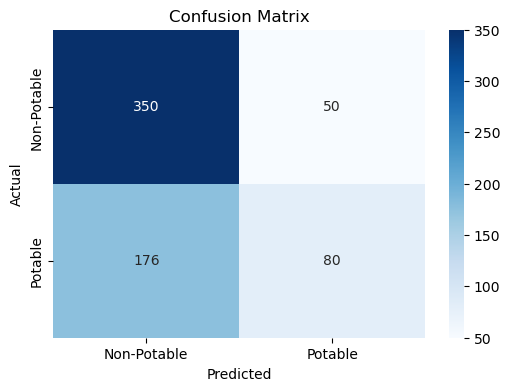

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", 
            xticklabels=['Non-Potable', 'Potable'], yticklabels=['Non-Potable', 'Potable'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


C:\Users\UpDate\AppData\Local\Temp\ipykernel_15688\1145181251.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


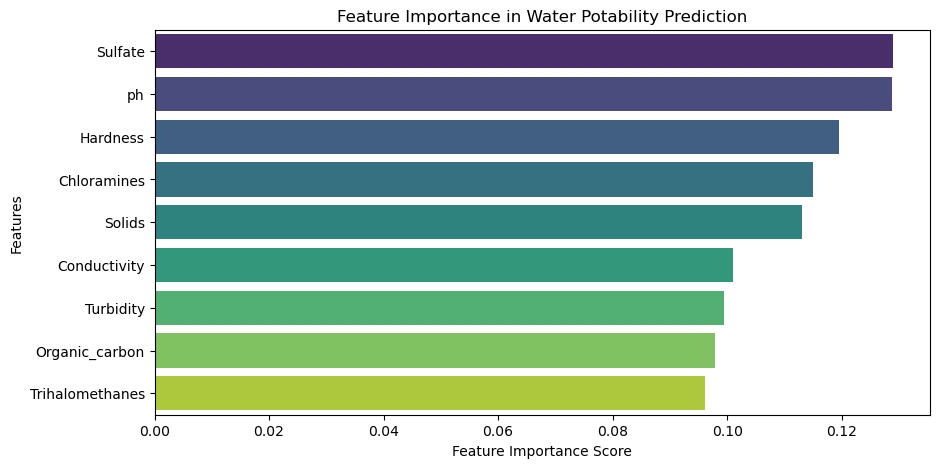

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the model has been trained and supports feature_importances_
importances = model.feature_importances_
feature_names = X.columns  # Ensure X is a DataFrame

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Water Potability Prediction")
plt.show()
